### Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [25]:

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
# Source - https://stackoverflow.com/a
# Posted by dgruending
# Retrieved 2025-12-03, License - CC BY-SA 4.0

%matplotlib inline


### Importing DataSet

#### About Dataset


This dataset captures a comprehensive snapshot of criminal activities across multiple Indian cities from 2020 to 2024. It includes detailed information about the type of crime, the date and time of occurrence, the weapon used, victim demographics, and the level of police deployment. With crimes ranging from identity theft to homicide, this dataset offers valuable insights for researchers, policymakers, and law enforcement agencies aiming to understand crime patterns and improve public safety. The data also includes information on whether the case was closed, providing a clear view of crime resolution rates across cities

In [6]:
df = pd.read_csv('Data/crime_dataset_india.csv')

In [7]:
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [8]:
# Let's first analyze the dataset as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [14]:
df.set_index(df['Report Number'], inplace = True)

In [15]:
# Let's Generate a Ydata Profile Report for this DataSet

# Generate the report
profile = ProfileReport(df,title="Indian Crimes Dataset")

# Save the report to .html
profile.to_file("indian_crimes.html")

Summarize dataset:  11%| | 2/19 [00:00<00:04,  3.53it/s, Describe variable: Weap
Summarize dataset:  42%|▍| 8/19 [00:02<00:04,  2.73it/s, Describe variable: Date
Summarize dataset:  63%|▋| 12/19 [00:13<00:15,  2.25s/it, Describe variable: Dat
Summarize dataset:  68%|▋| 13/19 [00:16<00:13,  2.28s/it, Describe variable: Dat
Export report to file: 100%|█████████████████████| 1/1 [00:00<00:00, 345.78it/s]


In [11]:
# You can open and check indian_Crimes.html for the Profile Report it has all the info about the data

In [16]:
# Further we will Perform the EDA Here:

### Univariate Analysis

In [18]:
# Report Number is not helpful for the Analysis so starting with Numerical Columns First
# - Victim Age

### 1. Victim Age
**Conclusion**
1. victim Age is normally Distributed
2. There is no Missing Value for the age columns
3. Stats

count    40160.00000

mean        44.49126

std         20.22555

min         10.00000

25%         27.00000

50%         44.00000

75%         62.00000

max         79.00000


In [19]:
df['Victim Age'].describe()

count    40160.00000
mean        44.49126
std         20.22555
min         10.00000
25%         27.00000
50%         44.00000
75%         62.00000
max         79.00000
Name: Victim Age, dtype: float64

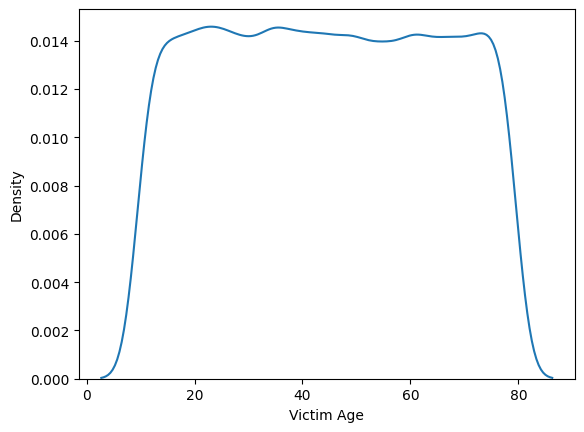

In [30]:
sns.kdeplot(data = df, x = "Victim Age")
plt.show()

In [31]:
df['Victim Age'].skew()  # ->  Normal Distribution

np.float64(0.008245431124500779)

In [32]:
df['Victim Age'].isnull().sum()

np.int64(0)

### 2. Police Deployed
**Conclusion**
1. Column is normally Distributed
2. No Missing Values for this col.
3. Stats

count    40160.000000

mean        10.006250

std          5.467951

min          1.000000

25%          5.000000

50%         10.000000

75%         15.000000

max         19.000000

In [34]:
df['Police Deployed'].describe()

count    40160.000000
mean        10.006250
std          5.467951
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         19.000000
Name: Police Deployed, dtype: float64

<Axes: ylabel='Density'>

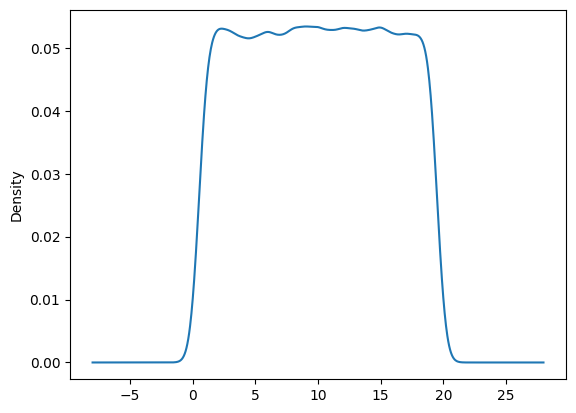

In [35]:
df['Police Deployed'].plot(kind = "kde")

In [36]:
df['Police Deployed'].skew() # Almost Normal Distribution

np.float64(-0.0038525496521411053)

In [37]:
df['Police Deployed'].isnull().sum()

np.int64(0)

### 3. City
**Conclusion**
1. Delhi has the most Crimes followed by Mumbai and Kolkata
2. No Missing Values for this col.


In [54]:
df['City'].value_counts().head(10)

City
Delhi        5400
Mumbai       4415
Bangalore    3588
Hyderabad    2881
Kolkata      2518
Chennai      2493
Pune         2212
Ahmedabad    1817
Jaipur       1479
Lucknow      1456
Name: count, dtype: int64

/var/folders/n2/xblt95t12h7cjhv3hf2dtsw00000gn/T/ipykernel_98320/50106910.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')


[Text(0, 0, 'Ahmedabad'),
 Text(1, 0, 'Chennai'),
 Text(2, 0, 'Ludhiana'),
 Text(3, 0, 'Pune'),
 Text(4, 0, 'Delhi'),
 Text(5, 0, 'Mumbai'),
 Text(6, 0, 'Surat'),
 Text(7, 0, 'Visakhapatnam'),
 Text(8, 0, 'Bangalore'),
 Text(9, 0, 'Kolkata'),
 Text(10, 0, 'Ghaziabad'),
 Text(11, 0, 'Hyderabad'),
 Text(12, 0, 'Jaipur'),
 Text(13, 0, 'Lucknow'),
 Text(14, 0, 'Bhopal'),
 Text(15, 0, 'Patna'),
 Text(16, 0, 'Kanpur'),
 Text(17, 0, 'Varanasi'),
 Text(18, 0, 'Nagpur'),
 Text(19, 0, 'Meerut'),
 Text(20, 0, 'Thane'),
 Text(21, 0, 'Indore'),
 Text(22, 0, 'Rajkot'),
 Text(23, 0, 'Vasai'),
 Text(24, 0, 'Agra'),
 Text(25, 0, 'Kalyan'),
 Text(26, 0, 'Nashik'),
 Text(27, 0, 'Srinagar'),
 Text(28, 0, 'Faridabad')]

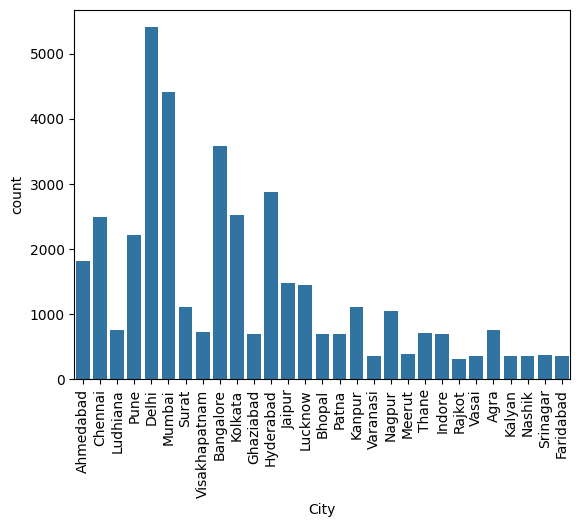

In [53]:
# df['City'].value_counts().plot(kind = "bar")
ax = sns.countplot(data = df, x = "City", orient = "h")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

In [55]:
df['City'].isnull().sum()

np.int64(0)

### 4. Crime Code
**Conclusion**
1. Most Occured Crime Code is 372,360 & 341 followed by 297 & 183
2. No Missing Value



In [56]:
df['Crime Code'].value_counts()

Crime Code
372    108
360    108
341    108
297    103
183    102
452    102
597    101
157    101
381    101
311    100
563    100
531     99
476     99
339     98
206     98
356     97
429     97
520     97
150     97
114     97
158     96
261     96
262     96
367     96
470     96
479     96
136     95
506     95
151     95
383     95
338     94
561     94
496     94
535     94
255     94
432     94
233     94
399     94
337     94
205     93
264     93
121     93
249     93
284     92
135     92
347     92
405     92
390     92
253     92
119     92
396     92
375     92
548     92
401     91
404     91
330     91
130     91
193     91
202     91
321     91
235     91
308     91
576     91
495     91
306     91
319     91
164     90
551     90
231     90
427     90
293     90
196     90
346     90
156     90
277     90
599     90
590     90
517     90
244     90
528     90
250     89
445     89
556     89
523     89
102     89
138     89
124     89
267     89
352     89
400     89

<Axes: xlabel='Crime Code'>

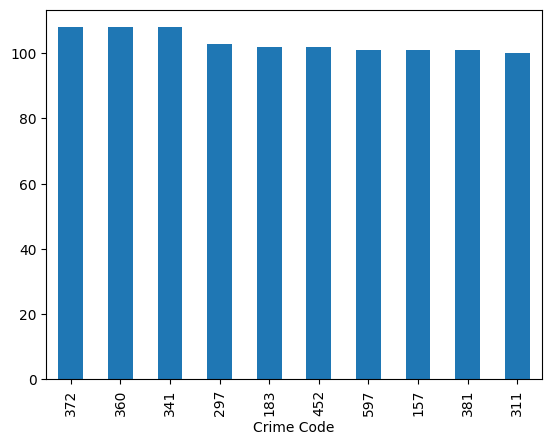

In [62]:
df['Crime Code'].value_counts().head(10).plot(kind =  "bar")

In [61]:
df['Crime Code'].value_counts().isnull().sum()

np.int64(0)

### 5. Crime Description
**Conclusion**
1. Most Occured Crime Code is 372,360 & 341 followed by 297 & 183
2. No Missing Value



In [63]:
df['Crime Description'].value_counts()

Crime Description
BURGLARY               1980
VANDALISM              1975
FRAUD                  1965
DOMESTIC VIOLENCE      1932
FIREARM OFFENSE        1931
ROBBERY                1928
KIDNAPPING             1920
IDENTITY THEFT         1918
SEXUAL ASSAULT         1917
ASSAULT                1915
TRAFFIC VIOLATION      1915
PUBLIC INTOXICATION    1912
HOMICIDE               1909
CYBERCRIME             1899
ILLEGAL POSSESSION     1895
ARSON                  1894
DRUG OFFENSE           1890
EXTORTION              1873
COUNTERFEITING         1871
VEHICLE - STOLEN       1862
SHOPLIFTING            1859
Name: count, dtype: int64

<Axes: xlabel='Crime Description'>

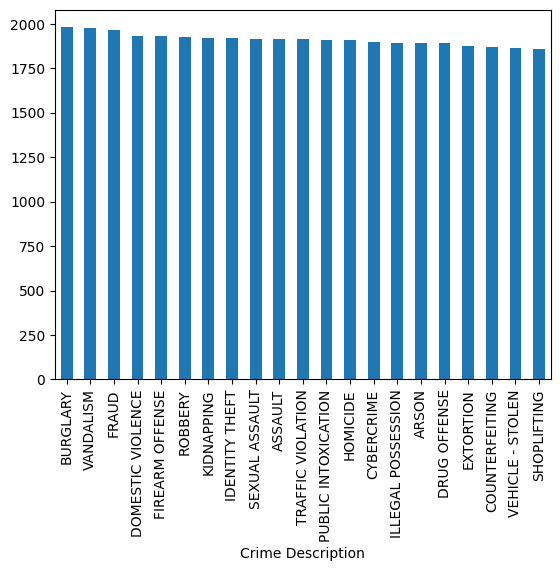

In [64]:
df['Crime Description'].value_counts().plot(kind = "bar")

In [66]:
df[df['Crime Code'] == 372]
# So basically for the same Crime Code there are multiple Crime Description

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
Report Number,,,,,,,,,,,,,,
508,508,25-01-2020 00:00,01-22-2020 03:00,22-01-2020 06:35,Jaipur,372,COUNTERFEITING,10,F,Poison,Other Crime,19,No,NaN
775,775,03-02-2020 15:00,02-02-2020 06:00,02-02-2020 08:40,Mumbai,372,IDENTITY THEFT,34,M,Explosives,Violent Crime,18,Yes,12-02-2020 15:00
971,971,12-02-2020 12:00,02-10-2020 10:00,10-02-2020 16:33,Bangalore,372,VEHICLE - STOLEN,32,M,NaN,Violent Crime,15,No,NaN
1268,1268,25-02-2020 09:00,02-22-2020 19:00,23-02-2020 01:50,Bangalore,372,ROBBERY,36,F,NaN,Violent Crime,19,No,NaN
1484,1484,05-03-2020 03:00,03-02-2020 19:00,03-03-2020 15:51,Faridabad,372,DRUG OFFENSE,21,F,Firearm,Other Crime,9,No,NaN
1549,1549,08-03-2020 02:00,03-05-2020 12:00,05-03-2020 20:55,Agra,372,TRAFFIC VIOLATION,26,F,Poison,Traffic Fatality,12,Yes,11-03-2020 02:00
1617,1617,11-03-2020 00:00,03-08-2020 08:00,08-03-2020 23:30,Visakhapatnam,372,DRUG OFFENSE,11,F,Poison,Other Crime,10,No,NaN
1628,1628,09-03-2020 16:00,03-08-2020 19:00,09-03-2020 07:38,Mumbai,372,ILLEGAL POSSESSION,15,M,Knife,Other Crime,15,Yes,07-04-2020 16:00
2266,2266,05-04-2020 15:00,04-04-2020 09:00,04-04-2020 12:02,Meerut,372,KIDNAPPING,32,M,Other,Other Crime,10,No,NaN


### 6. Victim Gender

**conclusion**
1.  More Than 20000 cases are reported to be crime against women
2.

<Axes: xlabel='Victim Gender'>

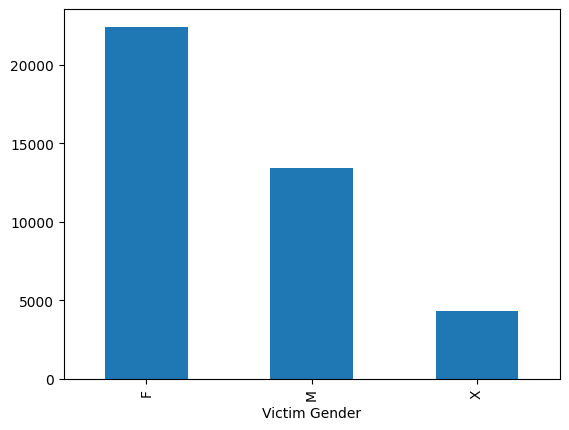

In [67]:
df['Victim Gender'].value_counts().plot(kind = "bar")

In [68]:
df['Victim Gender'].isnull().sum()

np.int64(0)

### 7. Cases Closed

**Conclusion**
1. So we have equivalent no of case closed as not.

<Axes: xlabel='Case Closed', ylabel='count'>

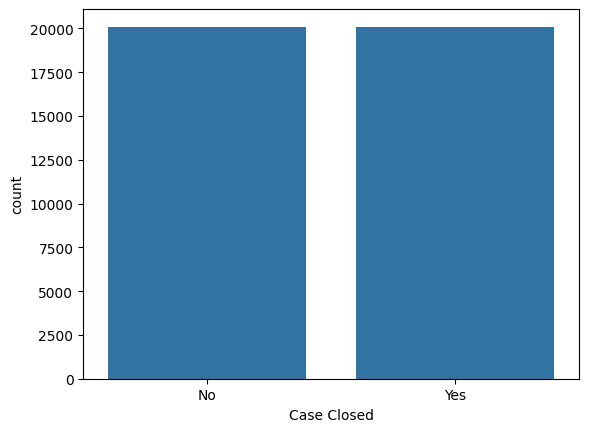

In [71]:
sns.countplot(data = df,x = "Case Closed")

In [72]:
df['Case Closed'].isnull().sum()

np.int64(0)


## Bivariate Analysis

<Axes: xlabel='Victim Gender', ylabel='Crime Code'>

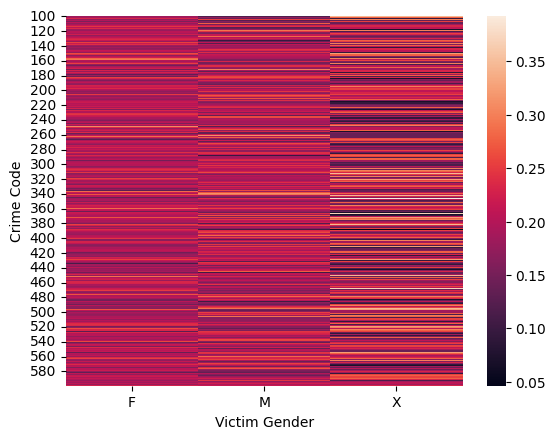

In [101]:
# Victim Gender vs Crime Code
sns.heatmap(pd.crosstab(df['Crime Code'],df['Victim Gender'],normalize="columns")*100)